### 이진 분류 모델의 평가

- TP (True Positive) : 실제 Positive를 Positive라고 맞춘 경우
- FN (False Negative) : 실제 Positive를 Negative라고 틀리게 예측한 경우
- TN (True Negative) : 실제 Negative를 Negative라고 맞춘 경우
- FP (False Positive) : 실제 Negative를 Positive라고 틀리게 예측한 경우

- Accuracy : 전체 데이터 중 맞게 예측한 것의 비율 

$ accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

- Precision : 양성이라고 예측한 것 중에서 실제 양성의 비율

$ precison = \frac{TP}{TP + FP} $

- ReCALL (TPR TRUE POSITIVE RATIO) : 참인 데이터들 중에서 참이라고 예측한 것

$ recall = \frac{TP}{TP + FN}$

- FALL OUT (FPR FALSE POSITION RATIO)

$ fallout = \frac{FP}{FP + FN}$




### ROC 커브 그려보기

In [2]:
import pandas as pd 

red_wine = pd.read_csv('/home/kkyu/amr_ws/ML/data/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('/home/kkyu/amr_ws/ML/data/winequality-white.csv', sep = ';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.7294593034442948
Test Acc :  0.7161538461538461


In [4]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)

print('Accuracy : ', accuracy_score(y_test, y_pred_test))
print('Recall : ', recall_score(y_test, y_pred_test))
print('Precision : ', precision_score(y_test, y_pred_test))
print('AUC Score : ', roc_auc_score(y_test, y_pred_test))
print('F1 Score : ', f1_score(y_test, y_pred_test))

Accuracy :  0.7161538461538461
Recall :  0.7314702308626975
Precision :  0.8026666666666666
AUC Score :  0.7105988470875331
F1 Score :  0.7654164017800381


## ROC Curve

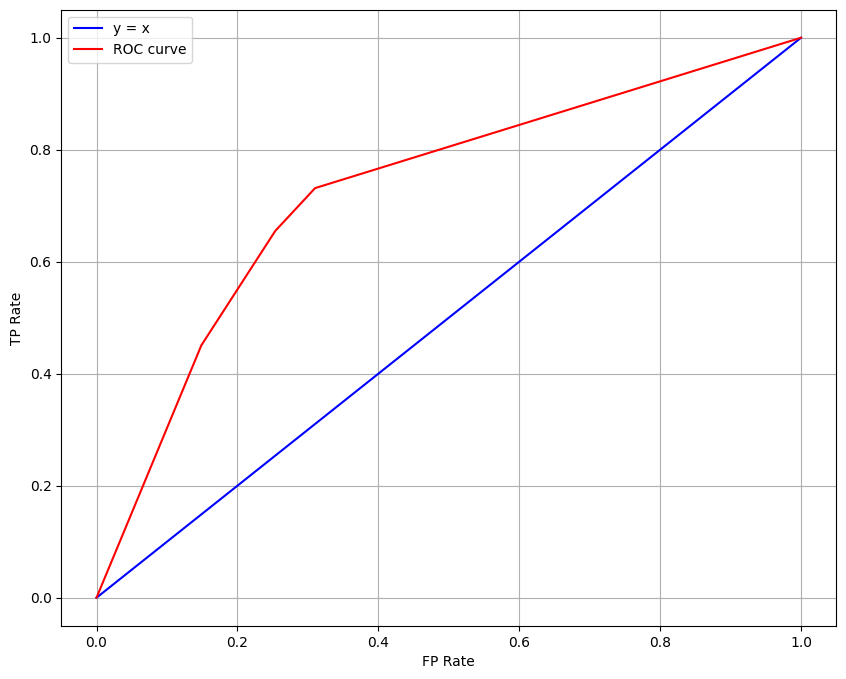

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline 

pred_proba = wine_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x')
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.grid()
plt.legend()

plt.show()

### AUC

- ROC 곡선 아래의 면적
- 일반적으로 1에 가까울 수록 좋은 수치
- 기울기가 1인 직선 아래의 면적이 0.5 -> AUC는 0.5보다 커야 함

### AUC 넓이 구하기

In [27]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_test)

print(auc_score)

0.7105988470875331
